In [1]:
import torch

t = torch.randn(3, 4)  # Generate a 3x4 tensor with random values from a normal distribution
print(t)
t.shape

tensor([[-0.0136,  0.4238, -1.3107,  1.0631],
        [ 1.1321,  0.4225, -2.6552,  0.3964],
        [ 0.1207,  0.1566, -1.5281,  0.8596]])


torch.Size([3, 4])

In [1]:
from functools import partial

def f(a,b):
    return a+b

print(f(1,2))

f_partial = partial(f, b=2)
print(f_partial(1))


3
3


In [1]:
class bifunc:
    def __init__(self):
        pass

    def add(self, a, b):
        return a+b
    
    def multiply(self, a, b):
        return a*b
    
bi = bifunc()

func = 'add'

getattr(bi, func)(1,2)




3

In [2]:
import os
from midi_player import MIDIPlayer
from midi_player.stylers import basic, cifka_advanced

os.chdir(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo")

dir = r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo\data\synthetic_dataset\monophonic_midis\maestro"

file_paths = []
for root, _, files in os.walk(dir):
    for file in files:
        file_paths.append(os.path.join(root, file))

file = file_paths[0]
print(file)

MIDIPlayer(file, height=400, styler=cifka_advanced)

ModuleNotFoundError: No module named 'midi_player'

In [ ]:
import partitura as pt

score = pt.load_score(file)


c:\Users\cunn2\miniconda3\envs\magenta\lib\site-packages\partitura\io\importmidi.py:524: UserWarning: pitch spelling
  warnings.warn("pitch spelling")
c:\Users\cunn2\miniconda3\envs\magenta\lib\site-packages\partitura\utils\misc.py:68: UserWarning: voice estimation
  return f(*args, **kwargs)
c:\Users\cunn2\miniconda3\envs\magenta\lib\site-packages\partitura\io\importmidi.py:607: UserWarning: create_part
  part = create_part(
c:\Users\cunn2\miniconda3\envs\magenta\lib\site-packages\partitura\io\importmidi.py:607: UserWarning: add notes
  part = create_part(
c:\Users\cunn2\miniconda3\envs\magenta\lib\site-packages\partitura\io\importmidi.py:607: UserWarning: add time sigs and measures
  part = create_part(
c:\Users\cunn2\miniconda3\envs\magenta\lib\site-packages\partitura\io\importmidi.py:607: UserWarning: tie notes
  part = create_part(
c:\Users\cunn2\miniconda3\envs\magenta\lib\site-packages\partitura\io\importmidi.py:607: UserWarning: find tuplets
  part = create_part(
c:\Users\cunn2

In [ ]:
score.note_array()


array([(  2.  , 0.25,   2.  , 0.25,   440,  55, 74, 1, 'n0', 220),
       (  3.  , 1.  ,   3.  , 1.  ,   660, 220, 81, 1, 'n1', 220),
       (  4.  , 0.25,   4.  , 0.25,   880,  55, 57, 1, 'n2', 220),
       (  5.  , 0.25,   5.  , 0.25,  1100,  55, 62, 1, 'n3', 220),
       (  6.  , 1.  ,   6.  , 1.  ,  1320, 220, 78, 1, 'n4', 220),
       (  7.  , 0.25,   7.  , 0.25,  1540,  55, 76, 1, 'n5', 220),
       (  7.25, 0.25,   7.25, 0.25,  1595,  55, 74, 1, 'n6', 220),
       (  7.5 , 0.25,   7.5 , 0.25,  1650,  55, 73, 1, 'n7', 220),
       (  7.75, 0.25,   7.75, 0.25,  1705,  55, 71, 1, 'n8', 220),
       (  8.25, 0.25,   8.25, 0.25,  1815,  55, 69, 1, 'n9', 220),
       (  8.5 , 0.25,   8.5 , 0.25,  1870,  55, 67, 1, 'n10', 220),
       (  8.75, 0.25,   8.75, 0.25,  1925,  55, 66, 1, 'n11', 220),
       (  9.75, 0.75,   9.75, 0.75,  2145, 165, 81, 1, 'n12', 220),
       ( 10.75, 0.25,  10.75, 0.25,  2365,  55, 79, 1, 'n13', 220),
       ( 11.  , 0.25,  11.  , 0.25,  2420,  55, 78, 1, 'n1

In [ ]:
part = score.parts[0]
f = part.time_sigs[0]
f.beat_type


4

In [ ]:
last_note = part.note_array()[-1]
last_note[0] + last_note[1]

268.5

In [ ]:
import partitura as pt
import numpy as np

from sms.src.synthetic_data.utils import midi_to_note_array

bar = midi_to_note_array(file, 1, start_bar_as_proportion=0.3)
bar

array([[ 0.1 , 76.  ],
       [ 0.5 , -1.  ],
       [ 0.25, 76.  ],
       [ 0.5 , -1.  ],
       [ 0.25, 65.  ],
       [ 0.25, 72.  ],
       [ 0.25, 71.  ],
       [ 0.25, -1.  ],
       [ 0.25, 69.  ],
       [ 1.  , 71.  ],
       [ 0.25, 69.  ],
       [ 0.15, 72.  ]])

In [ ]:
from sms.src.synthetic_data.note_arr_mod import NoteArrayModifier

mod = NoteArrayModifier()
mod.set_note_array(bar)
mod.generate_and_set_config(
    use_transposition=False,
    use_shift_selected_notes_pitch=False,
    use_change_note_durations=False,
    use_delete_notes=False,
    use_insert_notes=True
)
mod.modify_note_array()

mod.note_array

[2024-09-24 21:57:02] [INFO ] Inserting note at index 5 with duration 0.5 and relative pitch -6.
[2024-09-24 21:57:02] [INFO ] Removed note 12 with duration 0.14999999999999147 to adjust total duration.
[2024-09-24 21:57:02] [INFO ] Removed note 11 with duration 0.25 to adjust total duration.
[2024-09-24 21:57:02] [INFO ] Truncated note 10 by 0.10000000000000853 to maintain total duration.


array([[ 0.1 , 76.  ],
       [ 0.5 , -1.  ],
       [ 0.25, 76.  ],
       [ 0.5 , -1.  ],
       [ 0.25, 65.  ],
       [ 0.5 , 66.  ],
       [ 0.25, 72.  ],
       [ 0.25, 71.  ],
       [ 0.25, -1.  ],
       [ 0.25, 69.  ],
       [ 0.9 , 71.  ]])

In [ ]:
augs = {
    "use_transposition": False,
    "use_shift_selected_notes_pitch": False,
    "use_change_note_durations": False,
    "use_delete_notes": False,
    "use_insert_notes": True
}
mod(bar, augs)


[2024-09-24 21:57:02] [INFO ] Inserting note at index 11 with duration 0.5 and relative pitch -3.
[2024-09-24 21:57:02] [INFO ] Removed note 12 with duration 0.14999999999999147 to adjust total duration.
[2024-09-24 21:57:02] [INFO ] Truncated note 11 by 0.3500000000000085 to maintain total duration.


array([[ 0.1 , 76.  ],
       [ 0.5 , -1.  ],
       [ 0.25, 76.  ],
       [ 0.5 , -1.  ],
       [ 0.25, 65.  ],
       [ 0.25, 72.  ],
       [ 0.25, 71.  ],
       [ 0.25, -1.  ],
       [ 0.25, 69.  ],
       [ 1.  , 71.  ],
       [ 0.25, 69.  ],
       [ 0.15, 69.  ]])

In [4]:
import torch

dict = torch.load(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo\data\exp1\mtc_one_bar_segments_nr.pt")

C:\Users\cunn2\AppData\Local\Temp\ipykernel_227192\496293188.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dict = torch.load(r"C:\Users\cunn2\OneDrive\DSML\Project\the

In [ ]:
import os
import torch
from torch.utils.data import Dataset
import numpy as np
from typing import List

from sms.src.synthetic_data.note_arr_mod import NoteArrayModifier
from sms.src.synthetic_data.utils import midi_to_note_array
from sms.defaults import EXP1_SEGMENTS_PATH

class InputFormatter:
    """
    The raw segment dataset has note_arrays where each note has values [duration, pitch].
    """
    def __init__(
        self,
        normalize_octave: bool = False,
        make_relative_pitch: bool = False,
        quantize: bool = False,
        piano_roll: bool = False
    ):
        """
        The first three can all be used simultaneously.
        If piano_roll is True, then then rest are forced to False.
        """
        # removes possiblity of errors
        if piano_roll:
            self.config_piano_roll = True
            self.config_normalize_octave = False
            self.config_make_relative_pitch = False
            self.config_quantize = False
        else:
            self.config_piano_roll = False
            self.config_normalize_octave = normalize_octave
            self.config_make_relative_pitch = make_relative_pitch
            self.config_quantize = quantize

    def __call__(self, note_array: np.ndarray) -> np.ndarray:
        """
        note_array in form [duration, pitch].
        a one bar segment will be 4 beats.
        applies formatting to the note_array.
        """
        note_array = np.copy(note_array)
        if self.config_piano_roll:
            note_array = self.make_piano_roll(note_array)
        elif self.config_normalize_octave:
            note_array = self.normalize_octave(note_array)
        if self.config_make_relative_pitch:
            note_array = self.make_relative_pitch(note_array)
        if self.config_quantize:
            note_array = self.quantize(note_array)
        return note_array

    def normalize_octave(self, note_array: np.ndarray) -> np.ndarray:
        """
        note_array in form [duration, pitch].
        normalize the range of the pitch to 12-24, with 0 for rests.
        returns a note_array in form [duration, pitch_normalized_to_octave].
        """
        normalized_note_array = np.copy(note_array)
        non_rest_mask = normalized_note_array[:, 1] != 0
        normalized_note_array[non_rest_mask, 1] = (normalized_note_array[non_rest_mask, 1] % 12) + 12
        return normalized_note_array

    def make_relative_pitch(self, note_array: np.ndarray) -> np.ndarray:
        """
        note_array in form [duration, pitch].
        make the pitch relative to the previous note.
        returns a note_array in form [duration, pitch_relative_to_previous_note].
        """
        relative_pitch_note_array = np.copy(note_array)
        for i in reversed(range(len(relative_pitch_note_array)-1)):
            idx = i+1
            relative_pitch_note_array[idx][1] = relative_pitch_note_array[idx][1] - relative_pitch_note_array[idx-1][1]
        return relative_pitch_note_array

    def quantize(self, note_array: np.ndarray, steps_per_bar: int = 32) -> np.ndarray:
        """
        note_array where notes are in form [duration, pitch].
        transforms by dividing each bar into steps_per_bar bins. the value of each bin is the pitch of the note playing at the start.
        returns a (steps_per_bar * num_bars) length array.
        """
        note_array_bars = np.rint(np.sum(note_array[:, 0]) / 4)
        quantized_note_array = np.zeros(steps_per_bar * int(note_array_bars), dtype=int)

        # change the duration to 4 units per bar to steps_per_bar per bar
        note_array = np.copy(note_array)
        note_array[:, 0] *= steps_per_bar/4

        # add cumulative duration column
        cumulative_duration = np.cumsum(note_array[:, 0])
        note_array = np.column_stack((note_array, cumulative_duration))

        quantized_note_array = [note_array[0, 1]]
        quantized_note_array.extend([note_array[note_array[:, 2] <= i+1][-1][1] 
                                for i in range(steps_per_bar * int(note_array_bars)-1)])

        return np.array(quantized_note_array)
    
    def make_piano_roll(self, note_array: np.ndarray, steps_per_bar: int = 32) -> np.ndarray:
        """
        Converts a note_array in form [duration, pitch] to a piano roll representation.
        
        Args:
        note_array (np.ndarray): Array of notes in [duration, pitch] format.
        steps_per_bar (int): Number of time steps per bar (default is 32).
        
        Returns:
        np.ndarray: A 2D numpy array representing the piano roll.
        """
        quantized = self.quantize(note_array, steps_per_bar)
        
        piano_roll = np.zeros((127, steps_per_bar), dtype=int)
        
        for step, pitch in enumerate(quantized):
            if pitch != 0:  # not a rest
                pitch_idx = int(pitch) - 1  # Adjust for 1-127 range
                if 0 <= pitch_idx < 127:
                    piano_roll[pitch_idx, step] = 1

        return piano_roll

[[ 0.1  83.  ]
 [ 0.25  0.  ]
 [ 0.25 86.  ]
 [ 0.25 74.  ]
 [ 0.25  0.  ]
 [ 0.25 72.  ]
 [ 0.5  84.  ]
 [ 0.25 83.  ]
 [ 0.25 68.  ]
 [ 0.25 71.  ]
 [ 0.5   0.  ]
 [ 0.5  69.  ]
 [ 0.25 81.  ]
 [ 0.15 62.  ]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


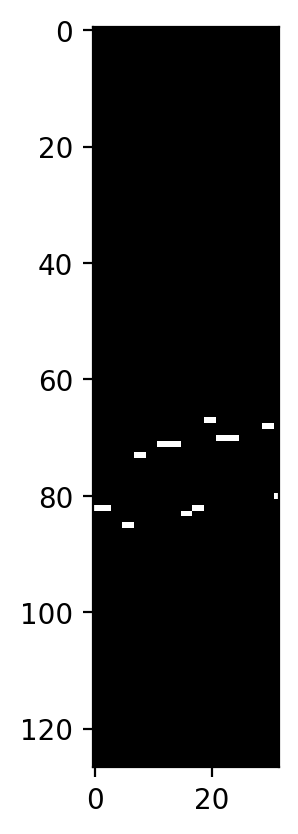

In [ ]:
arr = list(dict.values())[1]
print(arr)
formatter = InputFormatter(
    piano_roll=True
)

import matplotlib.pyplot as plt

print(formatter(arr))
plt.imshow(formatter(arr), cmap='gray', interpolation='none')



C:\Users\cunn2\AppData\Local\Temp\ipykernel_119028\3991460922.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dict = torch.load(EXP1_SEGMENTS_PATH)
[2024-09-20 11:35:06]

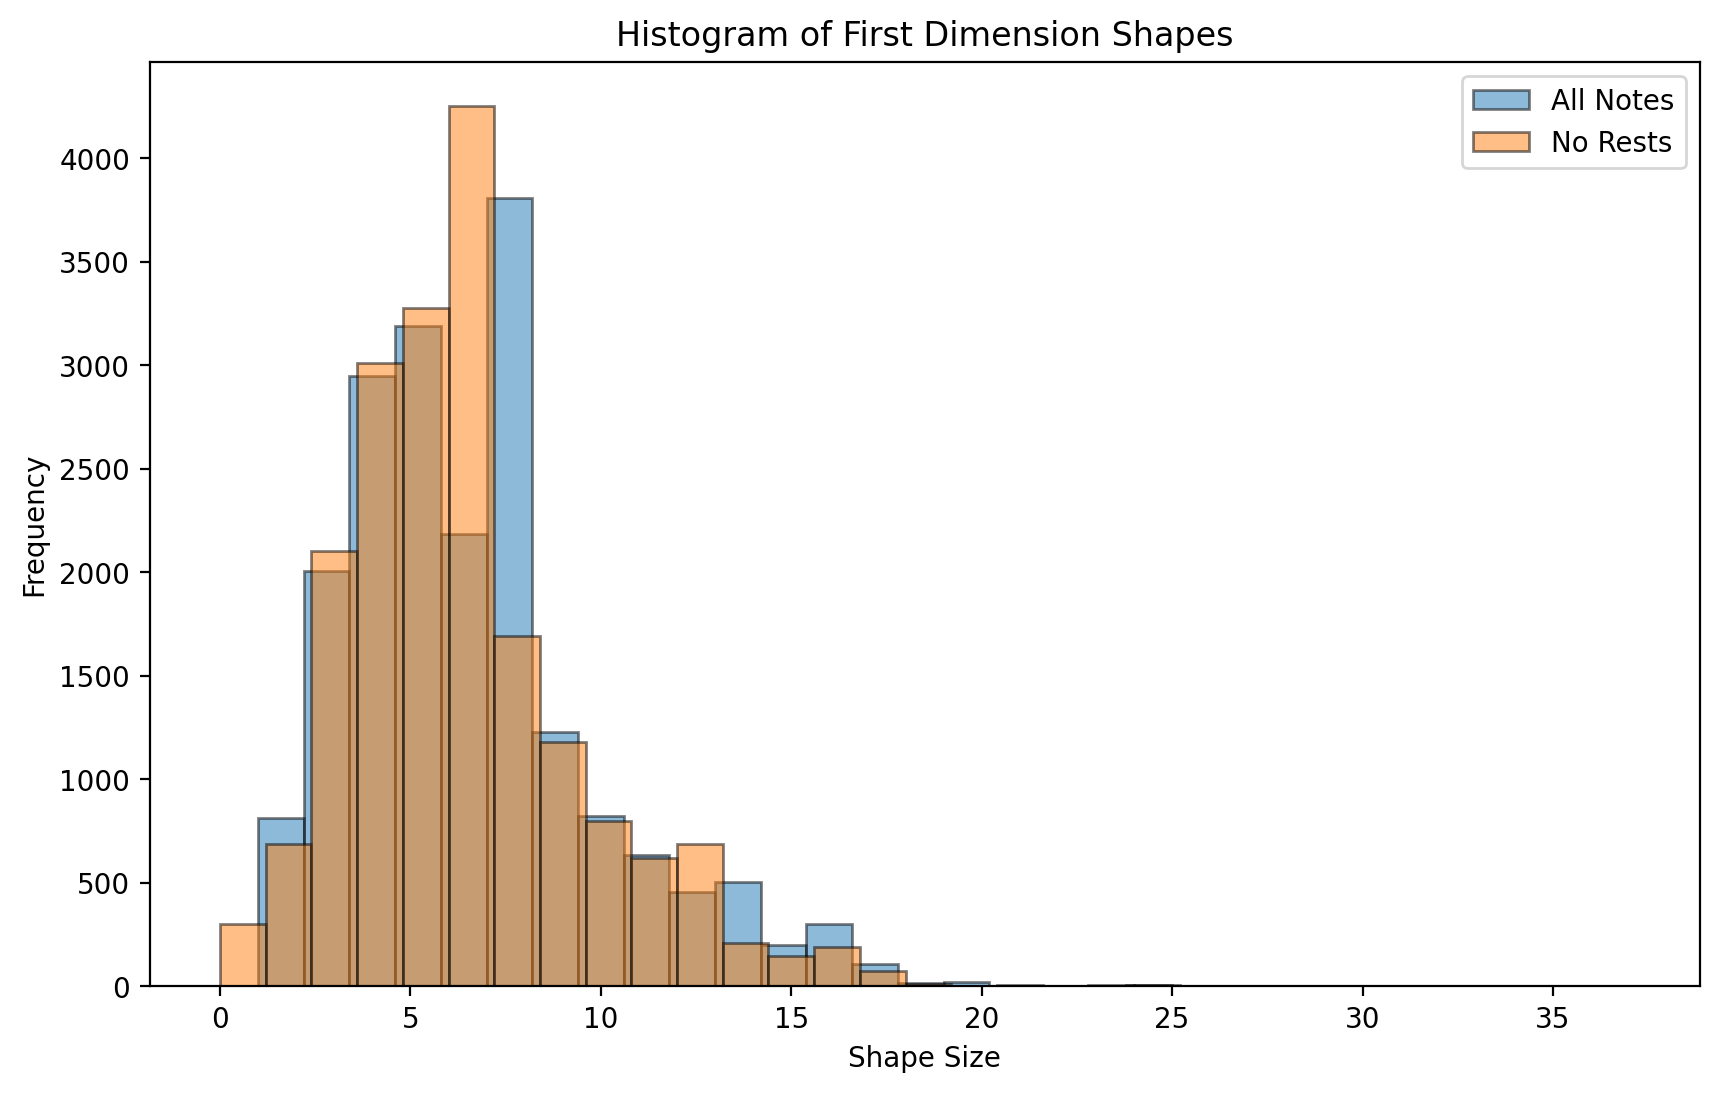

In [ ]:
import torch
from sms.defaults import EXP1_SEGMENTS_PATH
import matplotlib.pyplot as plt

dict = torch.load(EXP1_SEGMENTS_PATH)

# Extract the first dimension of the shape for each value
all_note_shapes = [value.shape[0] for value in dict.values()]
no_rest_values = [value[value[:,1]!=0] for value in dict.values()]
no_rest_shapes = [value.shape[0] for value in no_rest_values]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(all_note_shapes, bins=30, edgecolor='black', alpha=0.5, label='All Notes')
plt.hist(no_rest_shapes, bins=30, edgecolor='black', alpha=0.5, label='No Rests')
plt.title('Histogram of First Dimension Shapes')
plt.xlabel('Shape Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

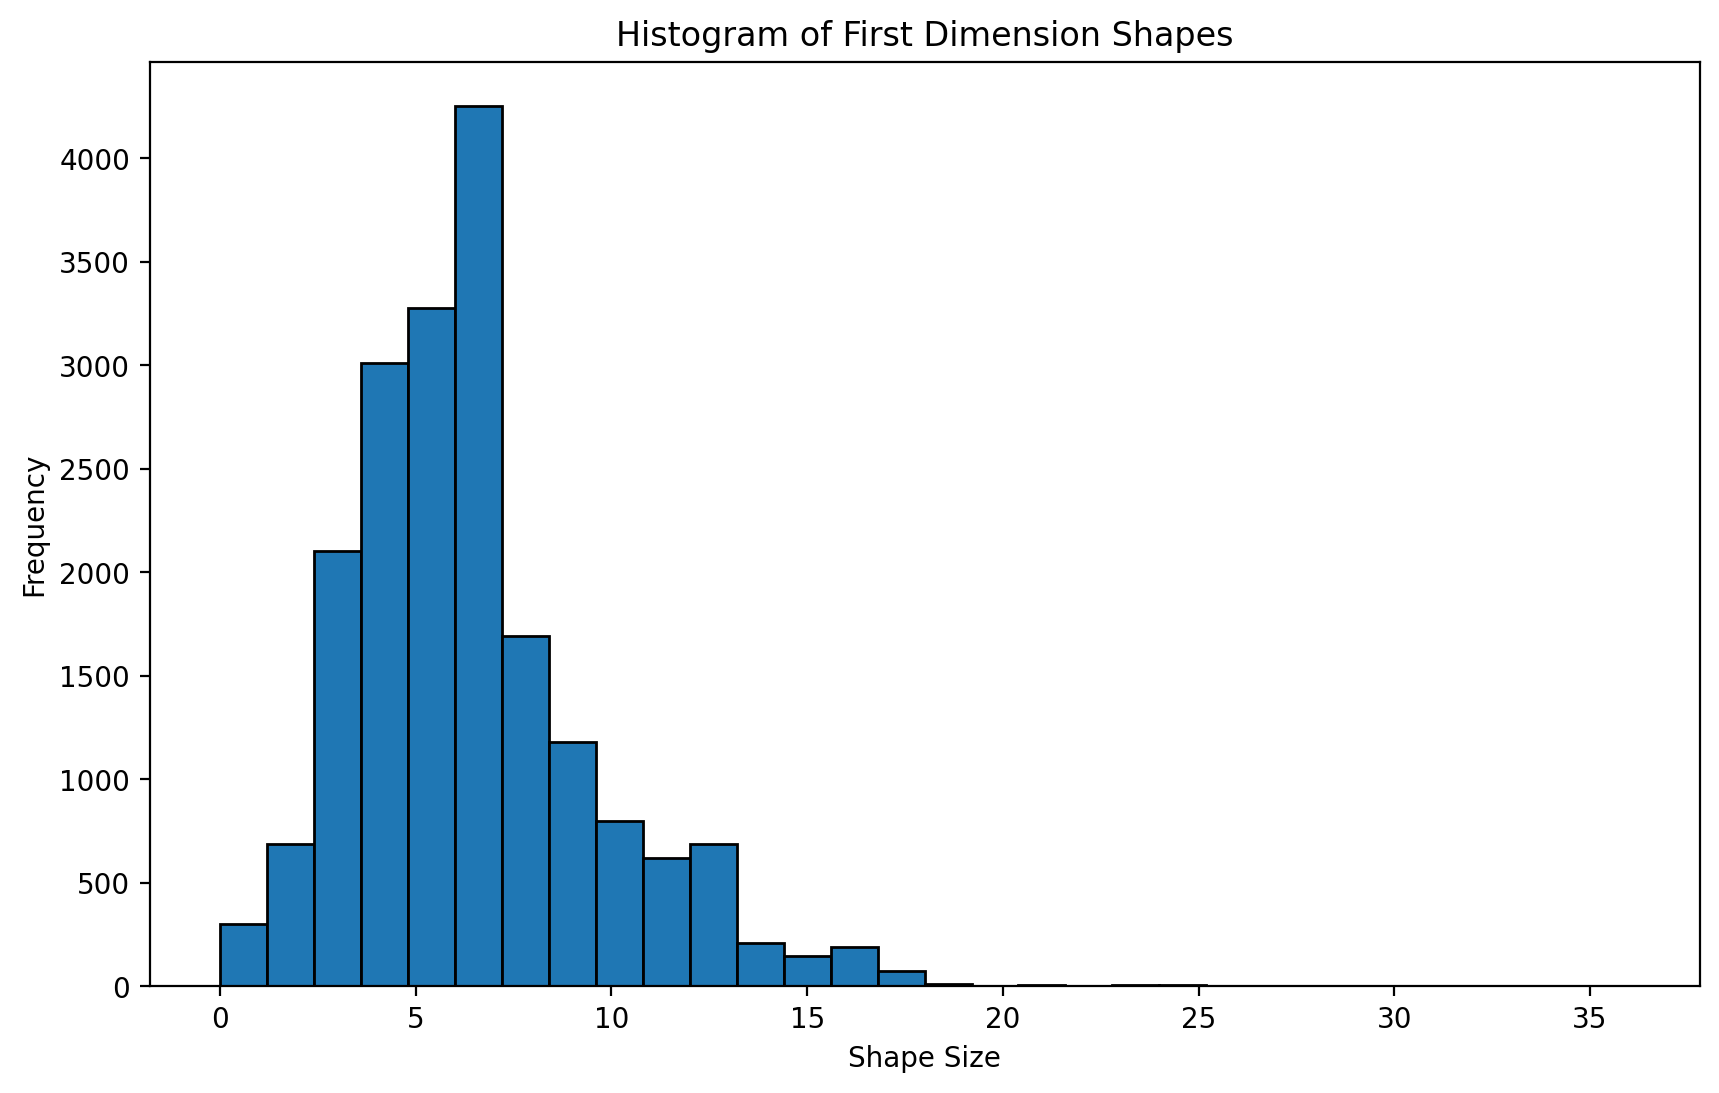

In [ ]:
import matplotlib.pyplot as plt

# Extract the first dimension of the shape for each value
no_rest_values = [value[value[:,1]!=0] for value in dict.values()]
shapes = [value.shape[0] for value in no_rest_values]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(shapes, bins=30, edgecolor='black')
plt.title('Histogram of First Dimension Shapes')
plt.xlabel('Shape Size')
plt.ylabel('Frequency')
plt.show()